# Wind Power Prediction using Deep Learning

**Course**: Deep Learning  
**School**: École Centrale Casablanca  
**Authors**:
- OUANZOUGUI Abdelhak
- EL ABDI Ibrahim

---

## Project Overview

This project focuses on predicting wind turbine active power using operational sensor data from the **ENGIE / Collège de France Wind Energy Regression Challenge (2018)**.

**Objective**:
1. Predict wind turbine active power
2. Detect suboptimal turbine operation by identifying significant deviations between expected and measured power

**Dataset**: `engie_WT1_20000_merged.csv` (20,000 samples, WT1 only)


## 1. Import Libraries


In [ ]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")



Libraries imported successfully!
TensorFlow version: 2.15.0


## 2. Data Loading


In [2]:
# Load the dataset
df = pd.read_csv('engie_WT1_20000_merged.csv', sep=';')

print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding TARGET
print(f"Number of samples: {df.shape[0]}")
print("\nFirst few rows:")
df.head()


Dataset shape: (20000, 79)
Number of features: 78
Number of samples: 20000

First few rows:


,ID,MAC_CODE,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,Hub_temperature_std,Generator_converter_speed,Generator_converter_speed_min,Generator_converter_speed_max,Generator_converter_speed_std,Generator_speed,Generator_speed_min,Generator_speed_max,Generator_speed_std,Generator_bearing_1_temperature,Generator_bearing_1_temperature_min,Generator_bearing_1_temperature_max,Generator_bearing_1_temperature_std,Generator_bearing_2_temperature,Generator_bearing_2_temperature_min,Generator_bearing_2_temperature_max,Generator_bearing_2_temperature_std,Generator_stator_temperature,Generator_stator_temperature_min,Generator_stator_temperature_max,Generator_stator_temperature_std,Gearbox_bearing_1_temperature,Gearbox_bearing_1_temperature_min,Gearbox_bearing_1_temperature_max,Gearbox_bearing_1_temperature_std,Gearbox_bearing_2_temperature,Gearbox_bearing_2_temperature_min,Gearbox_bearing_2_temperature_max,Gearbox_bearing_2_temperature_std,Gearbox_inlet_temperature,Gearbox_inlet_temperature_min,Gearbox_inlet_temperature_max,Gearbox_inlet_temperature_std,Gearbox_oil_sump_temperature,Gearbox_oil_sump_temperature_min,Gearbox_oil_sump_temperature_max,Gearbox_oil_sump_temperature_std,Nacelle_angle,Nacelle_angle_min,Nacelle_angle_max,Nacelle_angle_std,Nacelle_temperature,Nacelle_temperature_min,Nacelle_temperature_max,Nacelle_temperature_std,Absolute_wind_direction,Outdoor_temperature,Outdoor_temperature_min,Outdoor_temperature_max,Outdoor_temperature_std,Grid_frequency,Grid_frequency_min,Grid_frequency_max,Grid_frequency_std,Grid_voltage,Grid_voltage_min,Grid_voltage_max,Grid_voltage_std,Rotor_speed,Rotor_speed_min,Rotor_speed_max,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c,TARGET
0,462680,WT1,1.0,92.410004,92.410004,92.410004,0.0,8.24,8.0,9.0,0.28,3.92,3.78,3.86,0.01,0.17,-1.85,6.96,0.80,7.70,7.7,7.8,0.01,6.84,6.80,6.9,0.02,4.90,4.7,4.90,0.02,2.39,2.35,2.4,0.01,2.42,2.3,2.5,0.07,2.01,2.0,2.00,0.00,2.10,2.1,2.2,0.01,302.89999,302.89999,302.89999,0.0,4.89,4.8,5.1,0.09,301.44000,-0.70,-0.8,-0.70,0.01,49.980000,49.950001,50.000000,0.01,684.19000,681.66998,684.28998,0.58,0.0,0.0,0.0,0.0,2.38,2.3,2.5,0.06,301.44000,302.89999,-2.727
1,462681,WT1,2.0,92.410004,92.410004,92.410004,0.0,8.19,8.0,9.0,0.37,3.83,3.79,7.36,0.49,0.01,-0.50,6.30,0.64,7.71,7.7,7.9,0.02,6.88,6.80,6.9,0.04,4.90,4.8,4.95,0.02,2.39,2.30,2.4,0.02,2.44,2.3,2.5,0.07,2.17,2.0,2.20,0.06,2.10,2.1,2.2,0.01,302.89999,302.89999,302.89999,0.0,4.73,4.8,4.9,0.04,299.73999,-0.62,-0.8,-0.60,0.08,49.959999,49.959999,50.009998,0.01,686.10999,683.00000,686.40997,0.71,0.0,0.0,0.0,0.0,2.42,2.3,2.5,0.07,299.73999,302.89999,-2.782
2,462682,WT1,3.0,92.410004,92.410004,92.410004,0.0,8.90,8.0,9.0,0.48,3.92,3.78,5.11,0.15,0.13,-0.37,3.73,0.28,7.70,7.7,7.9,0.02,6.89,6.80,6.9,0.02,4.89,4.8,4.90,0.02,2.37,2.30,2.4,0.03,2.43,2.3,2.5,0.06,2.20,2.0,2.20,0.04,2.10,2.1,2.2,0.01,302.89999,302.89999,302.89999,0.0,4.54,4.6,4.8,0.09,332.13000,-0.60,-0.7,-0.60,0.02,49.959999,49.919998,50.000000,0.02,688.29999,685.60999,687.91998,0.70,0.0,0.0,0.0,0.0,2.42,2.3,2.5,0.07,332.13000,302.89999,-2.837
3,462683,WT1,4.0,92.410004,92.410004,92.410004,0.0,7.62,8.0,9.0,0.43,4.49,3.80,9.54,1.46,0.55,0.00,10.17,1.64,7.70,7.7,7.8,0.02,6.90,6.80,6.9,0.01,4.89,4.7,4.90,0.03,2.35,2.30,2.4,0.04,2.42,2.3,2.5,0.07,2.21,2.2,2.25,0.00,2.10,2.1,2.2,0.01,302.89999,302.89999,302.89999,0.0,4.33,4.3,4.6,0.07,322.01999,-0.60,-0.6,-0.50,0.01,49.980000,49.939999,50.000000,0.01,690.08002,687.32001,690.29999,0.72,0.0,0.0,0.0,0.0,2.40,2.3,2.5,0.07,322.01999,302.89999,-2.551
4,462684,WT1,5.0,92.410004,92.410004,92.410004,0.0,7.09,7.0,8.0,0.46,4.48,3.79,8.44,0.83,0.55,-0.68,7.16,0.92,7.70,7.7,7.8,0.02,6.90,6.85,6.9,0.01,4.89,4.7,4.90,0.03,2.33,2.30,2.4,0.03,2.42,2.3,2.5,0.07,2.26,2.2,2.30,0.03,2.13,2.1,2.2,0.01,302.89999,302.89999,302.89999,0.0,4.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Overview


In [3]:
# Basic information
print("=== Dataset Information ===")
df.info()

print("\n=== Summary Statistics ===")
df.describe()


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   20000 non-null  int64  
 1   MAC_CODE                             20000 non-null  object 
 2   Date_time                            20000 non-null  float64
 3   Pitch_angle                          20000 non-null  float64
 4   Pitch_angle_min                      20000 non-null  float64
 5   Pitch_angle_max                      20000 non-null  float64
 6   Pitch_angle_std                      20000 non-null  float64
 7   Hub_temperature                      20000 non-null  float64
 8   Hub_temperature_min                  20000 non-null  float64
 9   Hub_temperature_max                  20000 non-null  float64
 10  Hub_temperature_std                  20000 non-null  float64
 11  

,ID,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,Hub_temperature_std,Generator_converter_speed,Generator_converter_speed_min,Generator_converter_speed_max,Generator_converter_speed_std,Generator_speed,Generator_speed_min,Generator_speed_max,Generator_speed_std,Generator_bearing_1_temperature,Generator_bearing_1_temperature_min,Generator_bearing_1_temperature_max,Generator_bearing_1_temperature_std,Generator_bearing_2_temperature,Generator_bearing_2_temperature_min,Generator_bearing_2_temperature_max,Generator_bearing_2_temperature_std,Generator_stator_temperature,Generator_stator_temperature_min,Generator_stator_temperature_max,Generator_stator_temperature_std,Gearbox_bearing_1_temperature,Gearbox_bearing_1_temperature_min,Gearbox_bearing_1_temperature_max,Gearbox_bearing_1_temperature_std,Gearbox_bearing_2_temperature,Gearbox_bearing_2_temperature_min,Gearbox_bearing_2_temperature_max,Gearbox_bearing_2_temperature_std,Gearbox_inlet_temperature,Gearbox_inlet_temperature_min,Gearbox_inlet_temperature_max,Gearbox_inlet_temperature_std,Gearbox_oil_sump_temperature,Gearbox_oil_sump_temperature_min,Gearbox_oil_sump_temperature_max,Gearbox_oil_sump_temperature_std,Nacelle_angle,Nacelle_angle_min,Nacelle_angle_max,Nacelle_angle_std,Nacelle_temperature,Nacelle_temperature_min,Nacelle_temperature_max,Nacelle_temperature_std,Absolute_wind_direction,Outdoor_temperature,Outdoor_temperature_min,Outdoor_temperature_max,Outdoor_temperature_std,Grid_frequency,Grid_frequency_min,Grid_frequency_max,Grid_frequency_std,Grid_voltage,Grid_voltage_min,Grid_voltage_max,Grid_voltage_std,Rotor_speed,Rotor_speed_min,Rotor_speed_max,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c,TARGET
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,19994.000000,19994.000000,20000.000000
mean,472679.500000,11081.117950,15.486832,14.326578,16.918654,0.866295,16.505992,16.333880,16.666949,0.085371,1066.753594,953.605527,1176.293841,60.081203,1067.370287,953.573804,1177.455570,60.447584,37.465360,36.610893,38.309940,0.392564,33.731122,33.254790,34.198263,0.233808,54.342997,52.947422,55.745478,0.516637,53.632051,52.748523,54.464888,0.454844,57.002901,56.301885,57.662887,0.386776,45.948318,44.782602,47.056875,0.582863,49.661066,49.146600,50.137232,0.219652,190.148342,254.477280,260.319053,2.932571,22.579319,21.698060,23.432355,0.511938,189.272422,7.749849,7.552000,7.955055,0.106993,49.917742,49.866667,49.941809,0.022311,695.339643,690.447408,699.503261,2.118343,10.146643,9.057663,11.200461,0.575903,27.608055,27.498908,27.707537,0.055892,189.237116,190.116811,385.773232
std,5773.647028,5872.851169,31.241867,31.132071,31.755018,3.966349,5.931328,5.955271,5.922783,0.144461,616.025985,587.248539,643.069619,78.402015,617.071789,588.958183,643.125469,78.333642,11.017169,10.771477,11.303096,0.325087,10.472559,10.345309,10.625733,0.178667,16.909625,16.438372,17.451

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Features with missing values:")
    print(missing_df)
else:
    print("No missing values found!")


Features with missing values:
                       Column  Missing Count  Missing Percentage
76  Absolute_wind_direction_c              6                0.03
77            Nacelle_angle_c              6                0.03


### 3.2 Target Variable Analysis


In [5]:
# Analyze TARGET distribution before filtering
print("=== TARGET Variable Statistics ===")
print(f"Mean: {df['TARGET'].mean():.4f}")
print(f"Median: {df['TARGET'].median():.4f}")
print(f"Std: {df['TARGET'].std():.4f}")
print(f"Min: {df['TARGET'].min():.4f}")
print(f"Max: {df['TARGET'].max():.4f}")

# Count negative/zero values
num_negative = (df['TARGET'] <= 0).sum()
num_positive = (df['TARGET'] > 0).sum()
print(f"\nNegative or zero TARGET values: {num_negative} ({100 * num_negative / len(df):.2f}%)")
print(f"Positive TARGET values: {num_positive} ({100 * num_positive / len(df):.2f}%)")


=== TARGET Variable Statistics ===
Mean: 385.7732
Median: 216.0575
Std: 460.9370
Min: -17.3570
Max: 2249.9411

Negative or zero TARGET values: 4567 (22.84%)
Positive TARGET values: 15433 (77.17%)


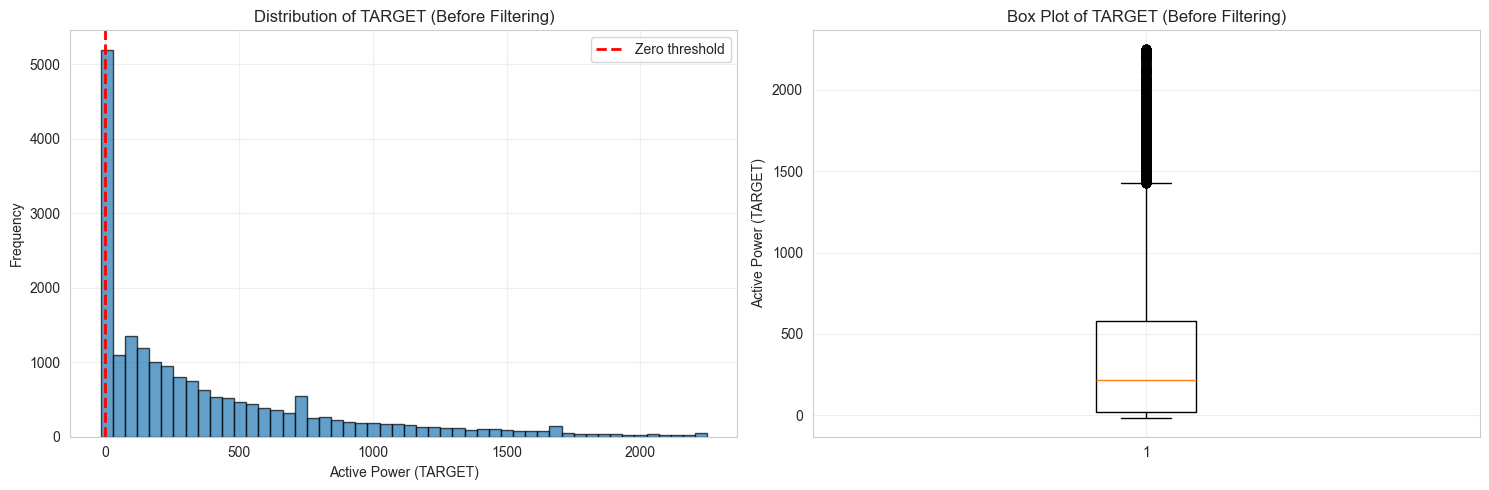

In [6]:
# Plot TARGET distribution before filtering
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['TARGET'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero threshold')
axes[0].set_xlabel('Active Power (TARGET)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of TARGET (Before Filtering)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['TARGET'], vert=True)
axes[1].set_ylabel('Active Power (TARGET)')
axes[1].set_title('Box Plot of TARGET (Before Filtering)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('target_distribution_before.png', dpi=300, bbox_inches='tight')
plt.show()


### 3.3 Key Feature Relationships


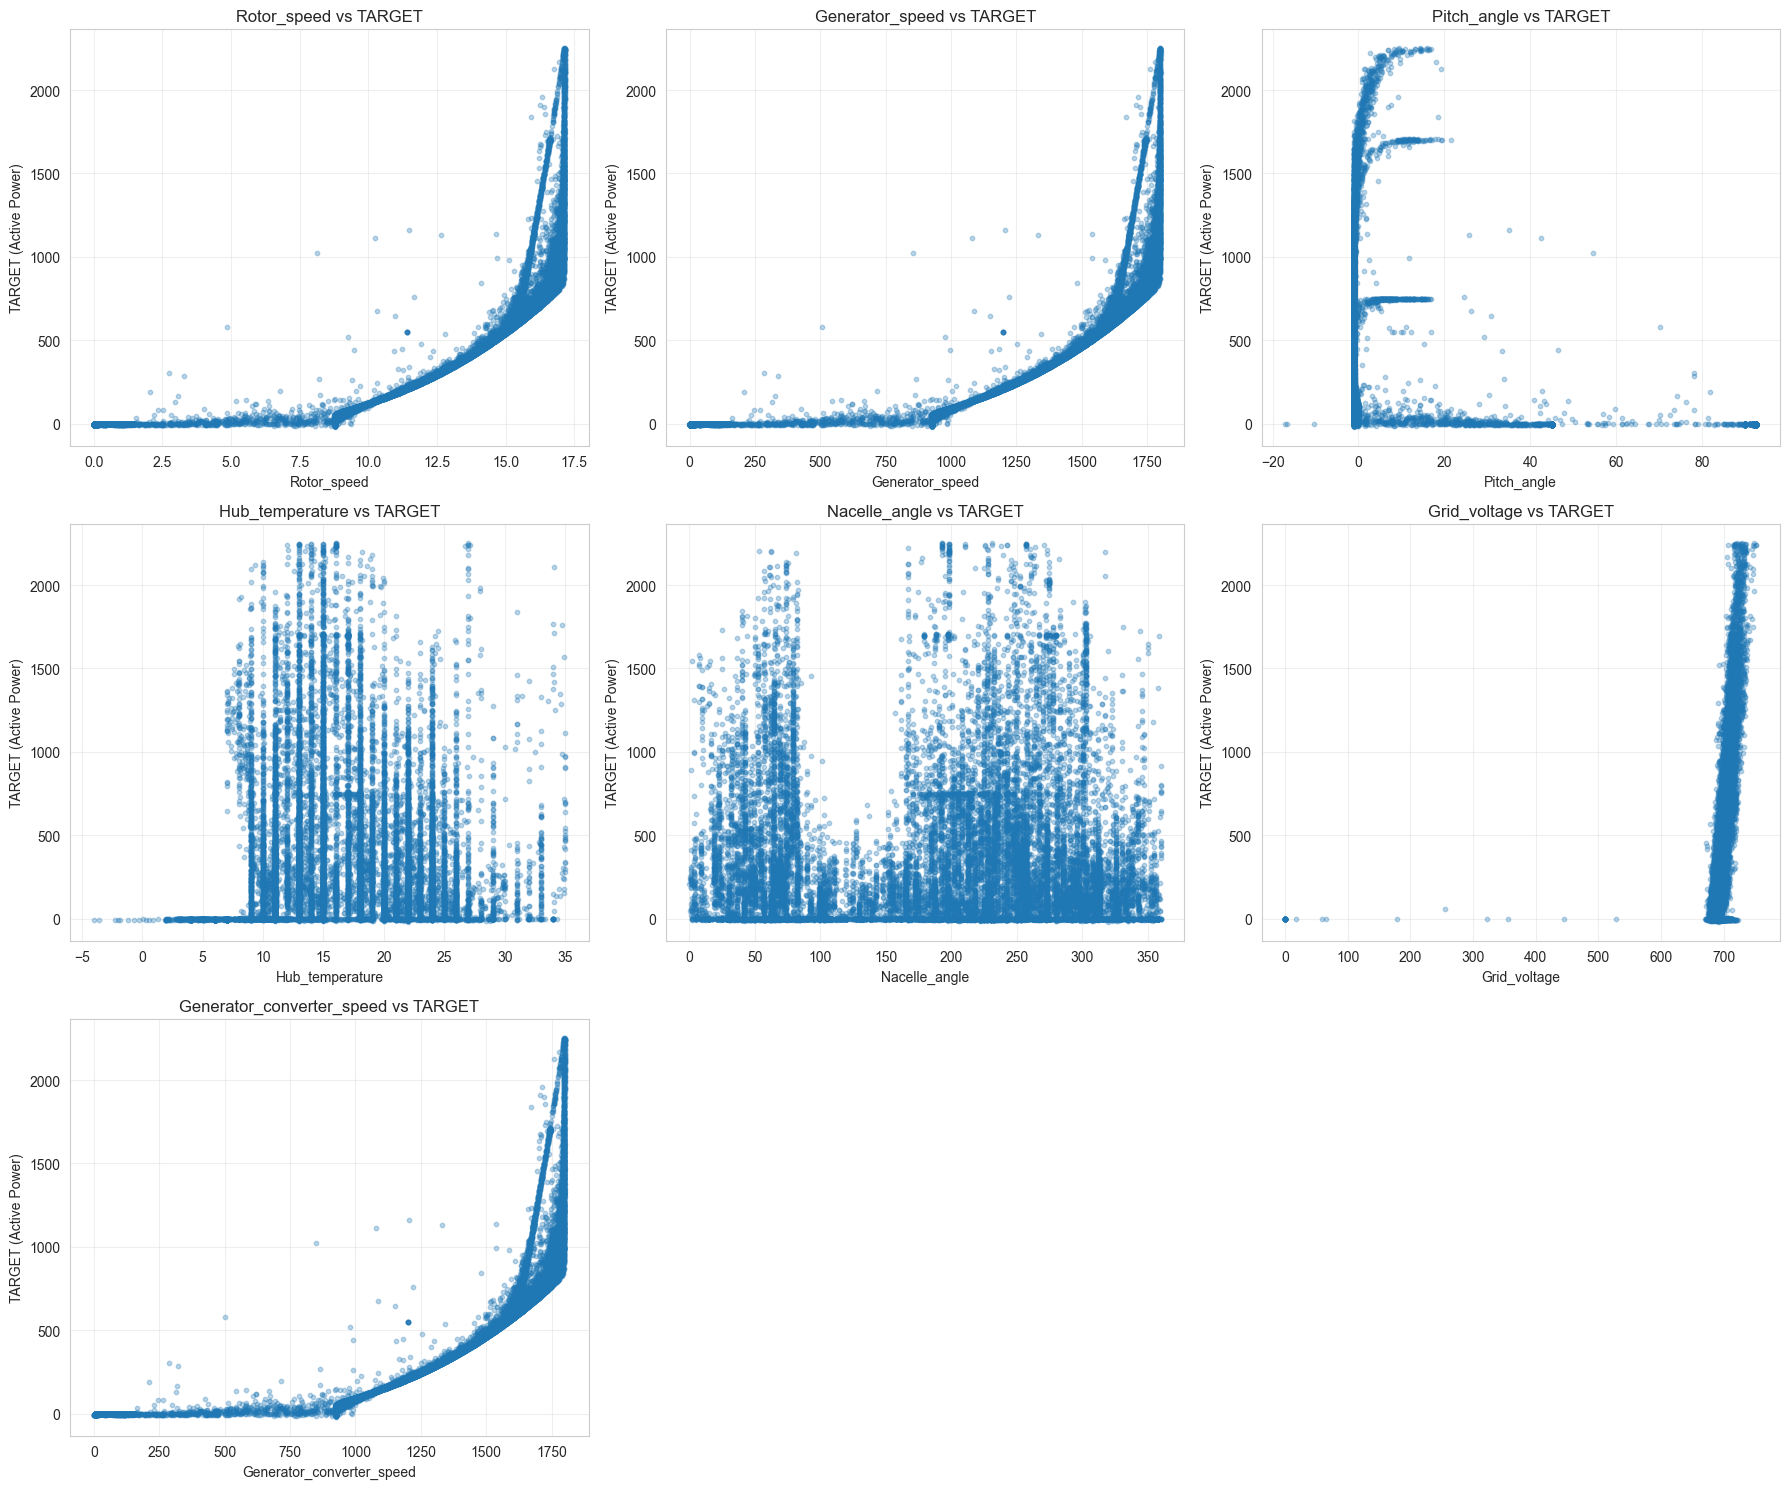

In [7]:
# Identify key features for analysis
key_features = ['Rotor_speed', 'Generator_speed', 'Pitch_angle', 'Hub_temperature', 
                'Nacelle_angle', 'Grid_voltage', 'Generator_converter_speed']

# Filter features that exist in the dataset
available_features = [f for f in key_features if f in df.columns]

# Create scatter plots for key features vs TARGET
n_features = len(available_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, feature in enumerate(available_features):
    axes[idx].scatter(df[feature], df['TARGET'], alpha=0.3, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('TARGET (Active Power)')
    axes[idx].set_title(f'{feature} vs TARGET')
    axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('feature_relationships.png', dpi=300, bbox_inches='tight')
plt.show()


### 3.4 Correlation Analysis


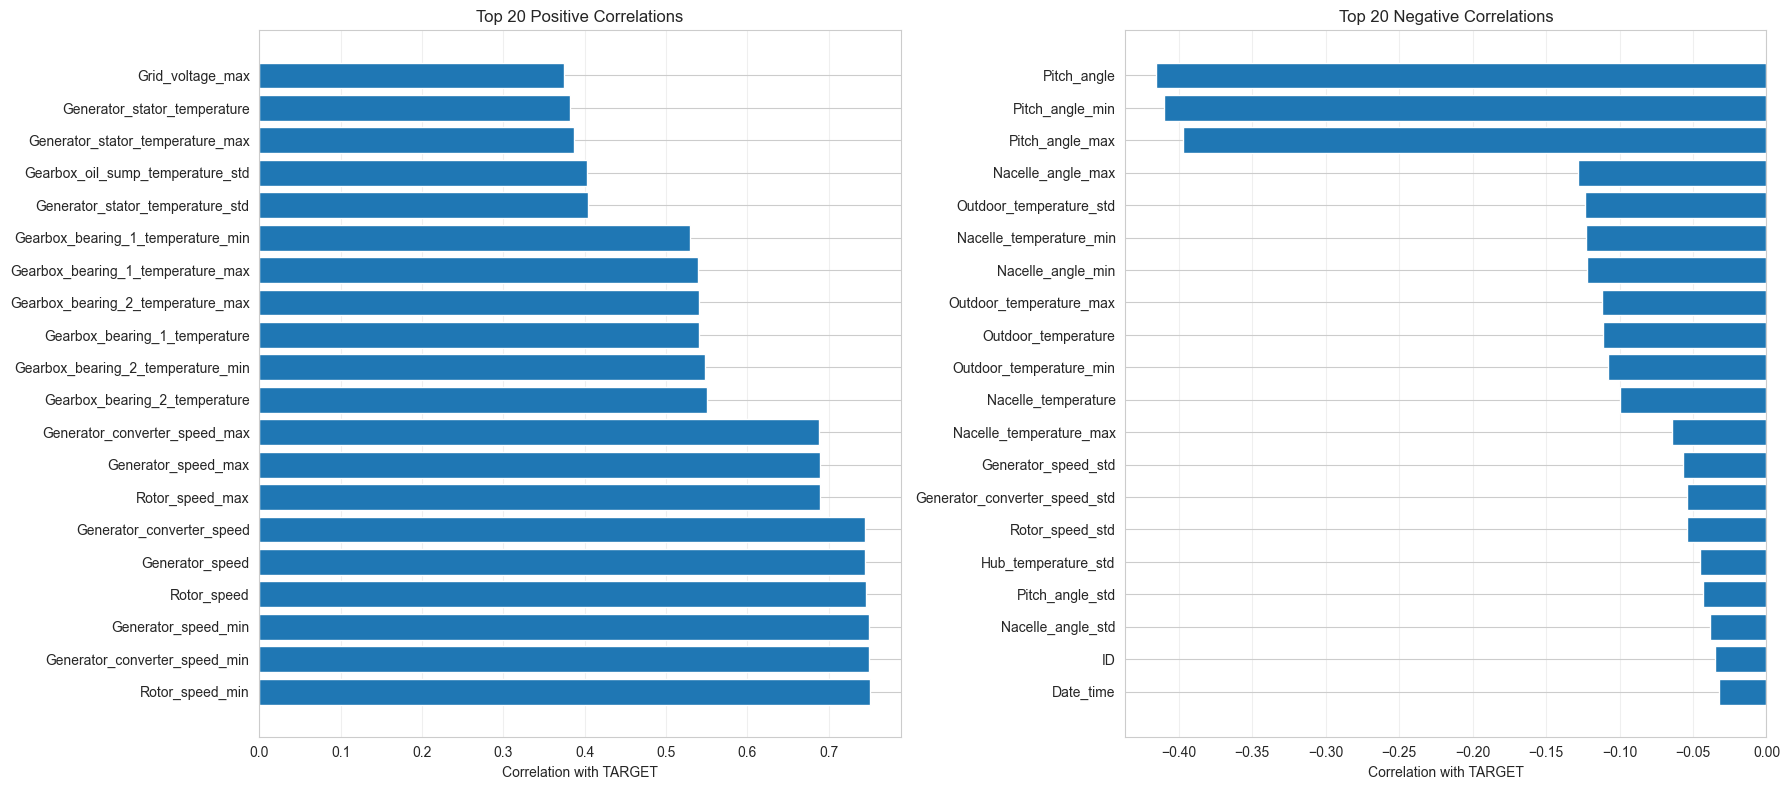


Top 10 features most correlated with TARGET:
Rotor_speed_min                  0.750724
Generator_converter_speed_min    0.749828
Generator_speed_min              0.749599
Rotor_speed                      0.745558
Generator_speed                  0.744781
Generator_converter_speed        0.744707
Rotor_speed_max                  0.689051
Generator_speed_max              0.688814
Generator_converter_speed_max    0.688081
Gearbox_bearing_2_temperature    0.550236
Name: TARGET, dtype: float64


In [8]:
# Calculate correlation with TARGET
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['TARGET'].sort_values(ascending=False)

# Remove TARGET itself
correlations = correlations.drop('TARGET')

# Plot top correlations
top_n = 20
top_corr = correlations.head(top_n)
bottom_corr = correlations.tail(top_n)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top positive correlations
axes[0].barh(range(len(top_corr)), top_corr.values)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index)
axes[0].set_xlabel('Correlation with TARGET')
axes[0].set_title(f'Top {top_n} Positive Correlations')
axes[0].grid(True, alpha=0.3, axis='x')

# Top negative correlations
axes[1].barh(range(len(bottom_corr)), bottom_corr.values)
axes[1].set_yticks(range(len(bottom_corr)))
axes[1].set_yticklabels(bottom_corr.index)
axes[1].set_xlabel('Correlation with TARGET')
axes[1].set_title(f'Top {top_n} Negative Correlations')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 10 features most correlated with TARGET:")
print(correlations.head(10))


## 4. Data Preprocessing

### 4.1 Remove Negative/Zero TARGET Values


Original dataset size: 20000
Filtered dataset size: 15433
Removed samples: 4567 (22.84%)


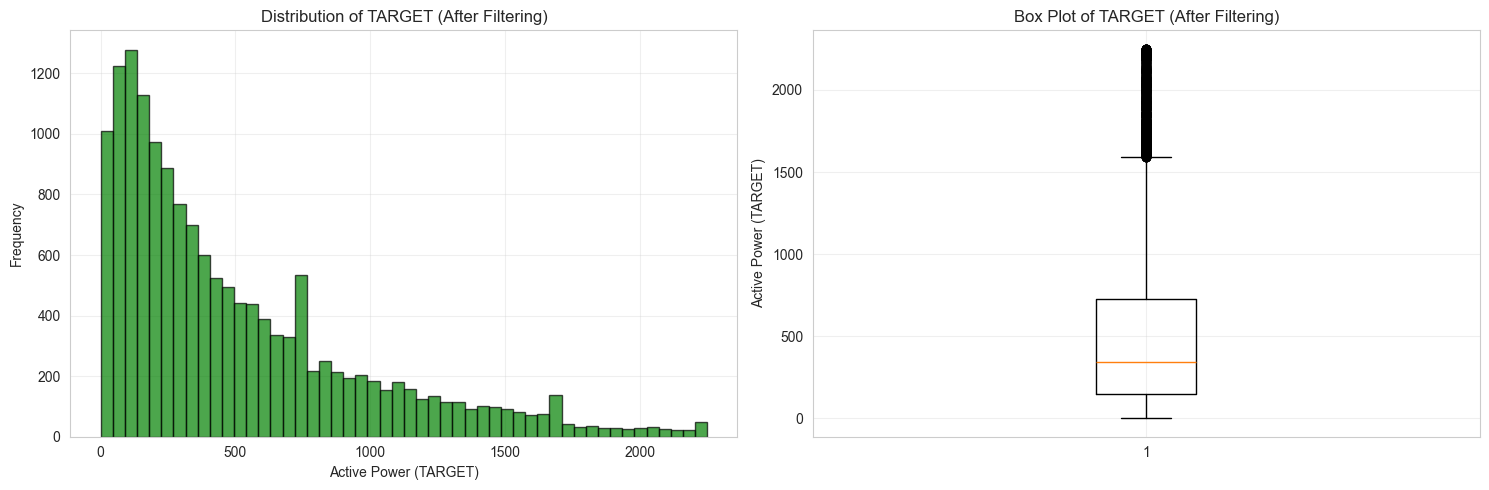

In [9]:
# Filter out negative or zero TARGET values
df_filtered = df[df['TARGET'] > 0].copy()

print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(df_filtered)}")
print(f"Removed samples: {len(df) - len(df_filtered)} ({(1 - len(df_filtered)/len(df))*100:.2f}%)")

# Plot TARGET distribution after filtering
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_filtered['TARGET'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Active Power (TARGET)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of TARGET (After Filtering)')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df_filtered['TARGET'], vert=True)
axes[1].set_ylabel('Active Power (TARGET)')
axes[1].set_title('Box Plot of TARGET (After Filtering)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('target_distribution_after.png', dpi=300, bbox_inches='tight')
plt.show()


### 4.2 Separate Features and Target


In [10]:
# Separate features and target
# Exclude ID, MAC_CODE, Date_time, and TARGET from features
exclude_cols = ['ID', 'MAC_CODE', 'Date_time', 'TARGET']
feature_cols = [col for col in df_filtered.columns if col not in exclude_cols]

X = df_filtered[feature_cols].copy()
y = df_filtered['TARGET'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Number of features: {len(feature_cols)}")


Feature matrix shape: (15433, 75)
Target vector shape: (15433,)
Number of features: 75


### 4.3 Handle Missing Values


In [11]:
# Check for missing values in features
missing_in_X = X.isnull().sum()
features_with_missing = missing_in_X[missing_in_X > 0]

if len(features_with_missing) > 0:
    print(f"Features with missing values: {len(features_with_missing)}")
    print(features_with_missing.head(10))
    
    # Apply simple imputation (median for numeric features)
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(
        imputer.fit_transform(X),
        columns=X.columns,
        index=X.index
    )
    print("\nMissing values imputed using median strategy.")
else:
    print("No missing values found in features.")
    X_imputed = X.copy()

# Verify no missing values remain
print(f"\nMissing values after imputation: {X_imputed.isnull().sum().sum()}")


Features with missing values: 2
Absolute_wind_direction_c    6
Nacelle_angle_c              6
dtype: int64

Missing values imputed using median strategy.

Missing values after imputation: 0


### 4.4 Remove Zero/Near-Zero Variance Features


In [12]:
# Remove zero and near-zero variance features
variance_selector = VarianceThreshold(threshold=0.01)
X_variance_filtered = variance_selector.fit_transform(X_imputed)

# Get selected feature names
selected_features = X_imputed.columns[variance_selector.get_support()]
X_final = pd.DataFrame(X_variance_filtered, columns=selected_features, index=X_imputed.index)

print(f"Original number of features: {X_imputed.shape[1]}")
print(f"Features after variance filtering: {X_final.shape[1]}")
print(f"Removed features: {X_imputed.shape[1] - X_final.shape[1]}")


Original number of features: 75
Features after variance filtering: 73
Removed features: 2


### 4.5 Train/Validation/Test Split


In [13]:
# Split: 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_final, y, test_size=0.15, random_state=42, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, shuffle=True  # 0.1765 ≈ 15/85
)

print(f"Training set: {X_train.shape[0]} samples ({100*X_train.shape[0]/len(X_final):.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({100*X_val.shape[0]/len(X_final):.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({100*X_test.shape[0]/len(X_final):.1f}%)")


Training set: 10802 samples (70.0%)
Validation set: 2316 samples (15.0%)
Test set: 2315 samples (15.0%)


### 4.6 Feature Scaling


In [14]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Features standardized successfully.")
print(f"Training set mean (should be ~0): {X_train_scaled.mean().mean():.6f}")
print(f"Training set std (should be ~1): {X_train_scaled.std().mean():.6f}")


Features standardized successfully.
Training set mean (should be ~0): -0.000000
Training set std (should be ~1): 1.000046


## 5. Baseline Model: Linear Regression


In [15]:
# Train Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_baseline = baseline_model.predict(X_train_scaled)
y_val_pred_baseline = baseline_model.predict(X_val_scaled)
y_test_pred_baseline = baseline_model.predict(X_test_scaled)

# Evaluation metrics
train_mae_baseline = mean_absolute_error(y_train, y_train_pred_baseline)
val_mae_baseline = mean_absolute_error(y_val, y_val_pred_baseline)
test_mae_baseline = mean_absolute_error(y_test, y_test_pred_baseline)

train_rmse_baseline = np.sqrt(mean_squared_error(y_train, y_train_pred_baseline))
val_rmse_baseline = np.sqrt(mean_squared_error(y_val, y_val_pred_baseline))
test_rmse_baseline = np.sqrt(mean_squared_error(y_test, y_test_pred_baseline))

train_r2_baseline = r2_score(y_train, y_train_pred_baseline)
val_r2_baseline = r2_score(y_val, y_val_pred_baseline)
test_r2_baseline = r2_score(y_test, y_test_pred_baseline)

print("=== Baseline Model (Linear Regression) Results ===")
print(f"\nTraining Set:")
print(f"  MAE: {train_mae_baseline:.4f}")
print(f"  RMSE: {train_rmse_baseline:.4f}")
print(f"  R²: {train_r2_baseline:.4f}")

print(f"\nValidation Set:")
print(f"  MAE: {val_mae_baseline:.4f}")
print(f"  RMSE: {val_rmse_baseline:.4f}")
print(f"  R²: {val_r2_baseline:.4f}")

print(f"\nTest Set:")
print(f"  MAE: {test_mae_baseline:.4f}")
print(f"  RMSE: {test_rmse_baseline:.4f}")
print(f"  R²: {test_r2_baseline:.4f}")


=== Baseline Model (Linear Regression) Results ===

Training Set:
  MAE: 59.9480
  RMSE: 84.5418
  R²: 0.9670

Validation Set:
  MAE: 66.0065
  RMSE: 168.2331
  R²: 0.8723

Test Set:
  MAE: 63.6108
  RMSE: 94.9270
  R²: 0.9588


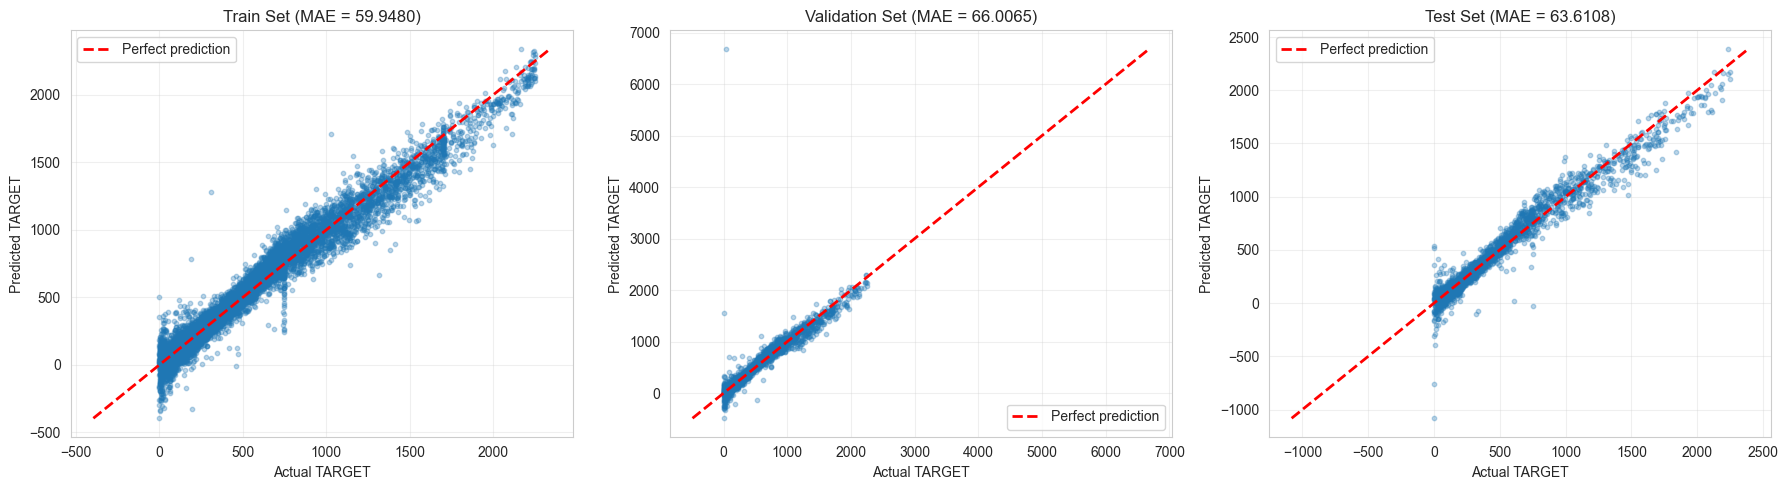

In [16]:
# Visualize baseline model predictions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sets = [('Train', y_train, y_train_pred_baseline, train_mae_baseline),
        ('Validation', y_val, y_val_pred_baseline, val_mae_baseline),
        ('Test', y_test, y_test_pred_baseline, test_mae_baseline)]

for idx, (set_name, y_true, y_pred, mae) in enumerate(sets):
    axes[idx].scatter(y_true, y_pred, alpha=0.3, s=10)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect prediction')
    axes[idx].set_xlabel('Actual TARGET')
    axes[idx].set_ylabel('Predicted TARGET')
    axes[idx].set_title(f'{set_name} Set (MAE = {mae:.4f})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('baseline_predictions.png', dpi=300, bbox_inches='tight')
plt.show()


## 5.5 Decision Tree Model

In [ ]:
# Train Decision Tree model with hyperparameter tuning
from sklearn.tree import DecisionTreeRegressor

print("=== Training Decision Tree Model ===")
# Try different max_depth values to find good balance
best_val_mae = float('inf')
best_depth = None

for max_depth in [10, 15, 20, 25, 30]:
    dt_temp = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=10, min_samples_leaf=5, random_state=42)
    dt_temp.fit(X_train_scaled, y_train)
    y_val_pred_temp = dt_temp.predict(X_val_scaled)
    val_mae_temp = mean_absolute_error(y_val, y_val_pred_temp)
    print(f"Max depth {max_depth}: Val MAE = {val_mae_temp:.4f}")
    if val_mae_temp < best_val_mae:
        best_val_mae = val_mae_temp
        best_depth = max_depth

print(f"\nBest max_depth: {best_depth}")

# Train final model with best hyperparameters
dt_model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)
print("Decision Tree model trained successfully!")

In [ ]:
# Predictions
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_val_pred_dt = dt_model.predict(X_val_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation metrics
train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
val_mae_dt = mean_absolute_error(y_val, y_val_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)

train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
val_rmse_dt = np.sqrt(mean_squared_error(y_val, y_val_pred_dt))
test_rmse_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

train_r2_dt = r2_score(y_train, y_train_pred_dt)
val_r2_dt = r2_score(y_val, y_val_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print("=== Decision Tree Model Results ===")
print(f"\nTraining Set:")
print(f"  MAE: {train_mae_dt:.4f}")
print(f"  RMSE: {train_rmse_dt:.4f}")
print(f"  R²: {train_r2_dt:.4f}")

print(f"\nValidation Set:")
print(f"  MAE: {val_mae_dt:.4f}")
print(f"  RMSE: {val_rmse_dt:.4f}")
print(f"  R²: {val_r2_dt:.4f}")

print(f"\nTest Set:")
print(f"  MAE: {test_mae_dt:.4f}")
print(f"  RMSE: {test_rmse_dt:.4f}")
print(f"  R²: {test_r2_dt:.4f}")

In [ ]:
# Visualize Decision Tree model predictions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sets = [('Train', y_train, y_train_pred_dt, train_mae_dt),
        ('Validation', y_val, y_val_pred_dt, val_mae_dt),
        ('Test', y_test, y_test_pred_dt, test_mae_dt)]

for idx, (set_name, y_true, y_pred, mae) in enumerate(sets):
    axes[idx].scatter(y_true, y_pred, alpha=0.3, s=10)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect prediction')
    axes[idx].set_xlabel('Actual TARGET')
    axes[idx].set_ylabel('Predicted TARGET')
    axes[idx].set_title(f'{set_name} Set (MAE = {mae:.4f})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('decision_tree_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Deep Neural Network Model


In [17]:
# Build DNN model
def build_dnn_model(input_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(1)  # Output layer (regression)
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_absolute_error',  # MAE as loss function
        metrics=['mae', 'mse']
    )
    
    return model

# Create model
dnn_model = build_dnn_model(X_train_scaled.shape[1])
dnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9472      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 

In [18]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_mae',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train the model
history = dnn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/100


338/338 [==============================] - 8s 9ms/step - loss: 196.8749 - mae: 196.8749 - mse: 121916.2578 - val_loss: 84.5462 - val_mae: 84.5462 - val_mse: 16518.9473 - lr: 0.0010
Epoch 2/100
338/338 [==============================] - 2s 7ms/step - loss: 92.5588 - mae: 92.5588 - mse: 20595.7852 - val_loss: 67.8263 - val_mae: 67.8263 - val_mse: 13088.8027 - lr: 0.0010
Epoch 3/100
338/338 [==============================] - 2s 7ms/step - loss: 82.0902 - mae: 82.0902 - mse: 17683.0664 - val_loss: 58.7440 - val_mae: 58.7440 - val_mse: 10058.4482 - lr: 0.0010
Epoch 4/100
338/338 [==============================] - 2s 7ms/step - loss: 77.5710 - mae: 77.5710 - mse: 16395.6191 - val_loss: 52.9069 - val_mae: 52.9069 - val_mse: 9137.8857 - lr: 0.0010
Epoch 5/100
338/338 [==============================] - 3s 8ms/step - loss: 73.6322 - mae: 73.6322 - mse: 15160.9688 - val_loss: 52.5003 - val_mae: 52.5003 - val_mse: 9433.7705 - lr: 0.0010
Epoch 6/100
338/338 [==========================

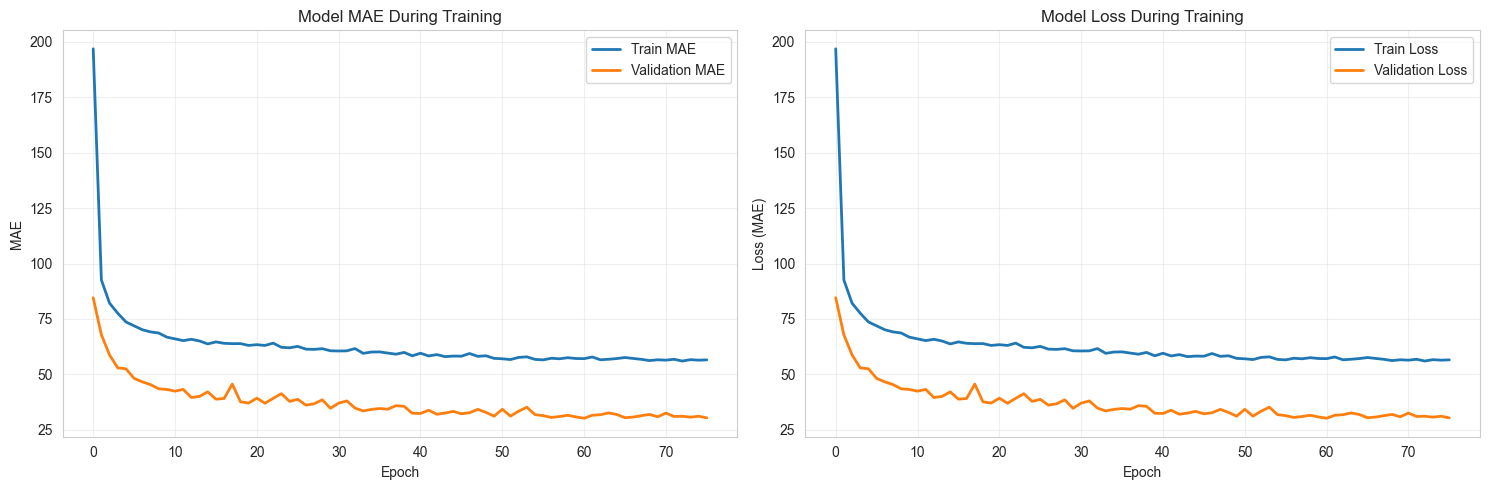

In [19]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# MAE
axes[0].plot(history.history['mae'], label='Train MAE', linewidth=2)
axes[0].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MAE')
axes[0].set_title('Model MAE During Training')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MAE)')
axes[1].set_title('Model Loss During Training')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dnn_training_history.png', dpi=300, bbox_inches='tight')
plt.show()


In [20]:
# Evaluate DNN model
y_train_pred_dnn = dnn_model.predict(X_train_scaled, verbose=0).flatten()
y_val_pred_dnn = dnn_model.predict(X_val_scaled, verbose=0).flatten()
y_test_pred_dnn = dnn_model.predict(X_test_scaled, verbose=0).flatten()

# Evaluation metrics
train_mae_dnn = mean_absolute_error(y_train, y_train_pred_dnn)
val_mae_dnn = mean_absolute_error(y_val, y_val_pred_dnn)
test_mae_dnn = mean_absolute_error(y_test, y_test_pred_dnn)

train_rmse_dnn = np.sqrt(mean_squared_error(y_train, y_train_pred_dnn))
val_rmse_dnn = np.sqrt(mean_squared_error(y_val, y_val_pred_dnn))
test_rmse_dnn = np.sqrt(mean_squared_error(y_test, y_test_pred_dnn))

train_r2_dnn = r2_score(y_train, y_train_pred_dnn)
val_r2_dnn = r2_score(y_val, y_val_pred_dnn)
test_r2_dnn = r2_score(y_test, y_test_pred_dnn)

print("=== Deep Neural Network Model Results ===")
print(f"\nTraining Set:")
print(f"  MAE: {train_mae_dnn:.4f}")
print(f"  RMSE: {train_rmse_dnn:.4f}")
print(f"  R²: {train_r2_dnn:.4f}")

print(f"\nValidation Set:")
print(f"  MAE: {val_mae_dnn:.4f}")
print(f"  RMSE: {val_rmse_dnn:.4f}")
print(f"  R²: {val_r2_dnn:.4f}")

print(f"\nTest Set:")
print(f"  MAE: {test_mae_dnn:.4f}")
print(f"  RMSE: {test_rmse_dnn:.4f}")
print(f"  R²: {test_r2_dnn:.4f}")


=== Deep Neural Network Model Results ===

Training Set:
  MAE: 26.9453
  RMSE: 53.8707
  R²: 0.9866

Validation Set:
  MAE: 30.1794
  RMSE: 68.1800
  R²: 0.9790

Test Set:
  MAE: 29.2189
  RMSE: 58.6821
  R²: 0.9843


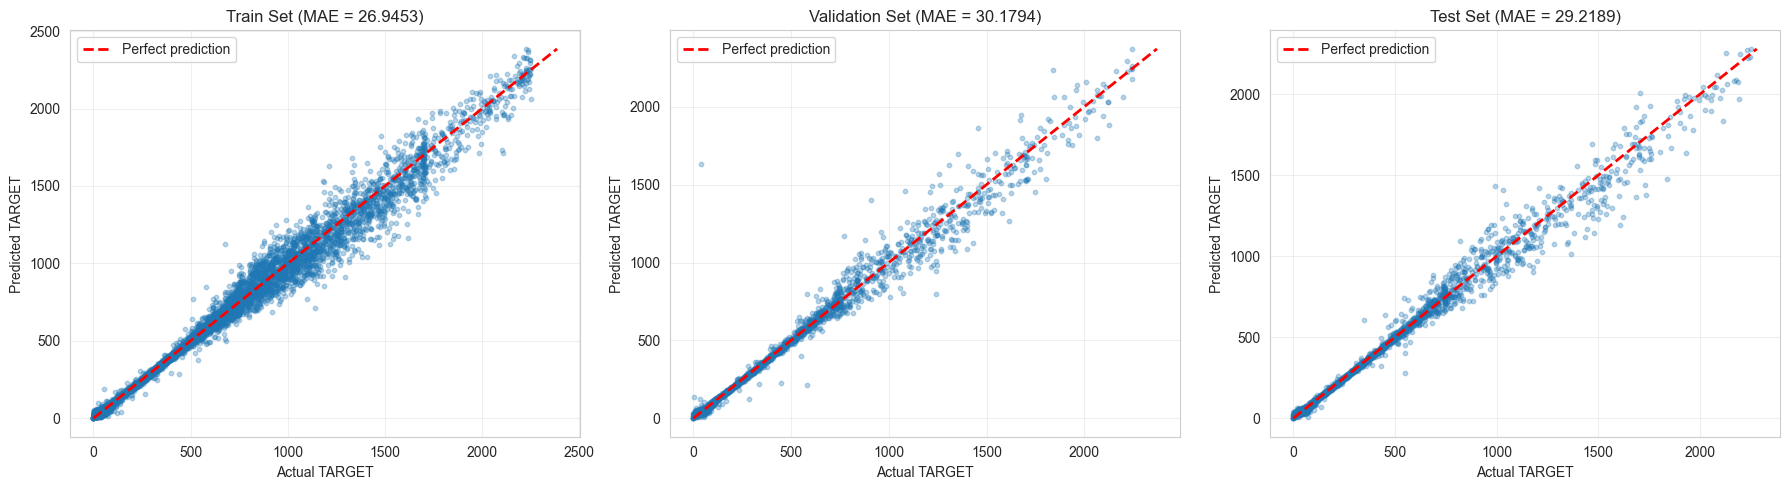

In [21]:
# Visualize DNN model predictions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sets = [('Train', y_train, y_train_pred_dnn, train_mae_dnn),
        ('Validation', y_val, y_val_pred_dnn, val_mae_dnn),
        ('Test', y_test, y_test_pred_dnn, test_mae_dnn)]

for idx, (set_name, y_true, y_pred, mae) in enumerate(sets):
    axes[idx].scatter(y_true, y_pred, alpha=0.3, s=10)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect prediction')
    axes[idx].set_xlabel('Actual TARGET')
    axes[idx].set_ylabel('Predicted TARGET')
    axes[idx].set_title(f'{set_name} Set (MAE = {mae:.4f})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dnn_predictions.png', dpi=300, bbox_inches='tight')
plt.show()


## 7. Model Comparison


=== Model Comparison ===
              Model  Train MAE   Val MAE  Test MAE  Train R²   Val R²  Test R²
  Linear Regression  59.947997 66.006549  63.61084  0.966957 0.872269 0.958814
Deep Neural Network  26.945344 30.179450  29.21886  0.986584 0.979021 0.984261


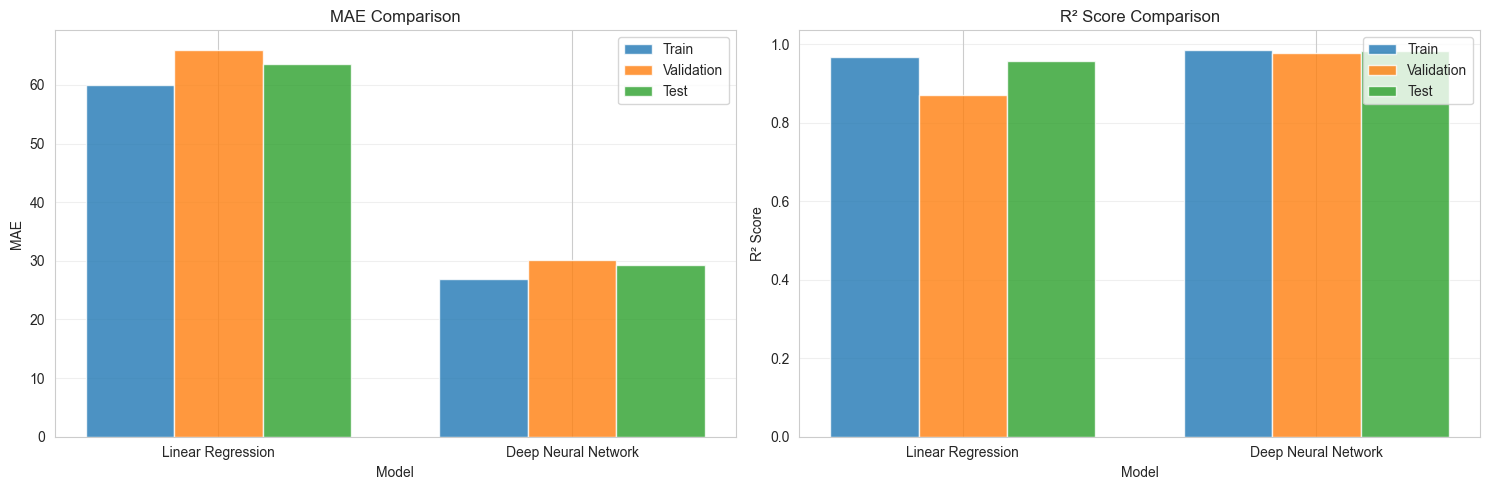

In [22]:
# Compare models
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Deep Neural Network'],
    'Train MAE': [train_mae_baseline, train_mae_dnn],
    'Val MAE': [val_mae_baseline, val_mae_dnn],
    'Test MAE': [test_mae_baseline, test_mae_dnn],
    'Train R²': [train_r2_baseline, train_r2_dnn],
    'Val R²': [val_r2_baseline, val_r2_dnn],
    'Test R²': [test_r2_baseline, test_r2_dnn]
})

print("=== Model Comparison ===")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# MAE comparison
x = np.arange(len(comparison_df))
width = 0.25
axes[0].bar(x - width, comparison_df['Train MAE'], width, label='Train', alpha=0.8)
axes[0].bar(x, comparison_df['Val MAE'], width, label='Validation', alpha=0.8)
axes[0].bar(x + width, comparison_df['Test MAE'], width, label='Test', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MAE')
axes[0].set_title('MAE Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# R² comparison
axes[1].bar(x - width, comparison_df['Train R²'], width, label='Train', alpha=0.8)
axes[1].bar(x, comparison_df['Val R²'], width, label='Validation', alpha=0.8)
axes[1].bar(x + width, comparison_df['Test R²'], width, label='Test', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R² Score')
axes[1].set_title('R² Score Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison_df['Model'])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [23]:
# Use the best model (DNN) for performance monitoring
# Compute residuals on test set
residuals = y_test - y_test_pred_dnn

# Define threshold based on percentile (e.g., 95th percentile of absolute residuals)
threshold_percentile = 95
residual_threshold = np.percentile(np.abs(residuals), threshold_percentile)

# Flag underperforming periods (where actual power is significantly lower than predicted)
underperformance_flags = (residuals < -residual_threshold)

print(f"=== Turbine Performance Monitoring ===")
print(f"Residual threshold (95th percentile): {residual_threshold:.4f}")
print(f"Number of underperforming periods: {underperformance_flags.sum()}")
print(f"Percentage of underperforming periods: {100 * underperformance_flags.sum() / len(underperformance_flags):.2f}%")
print(f"\nMean residual: {residuals.mean():.4f}")
print(f"Std residual: {residuals.std():.4f}")


=== Turbine Performance Monitoring ===
Residual threshold (95th percentile): 134.8016
Number of underperforming periods: 43
Percentage of underperforming periods: 1.86%

Mean residual: 4.6669
Std residual: 58.5088


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

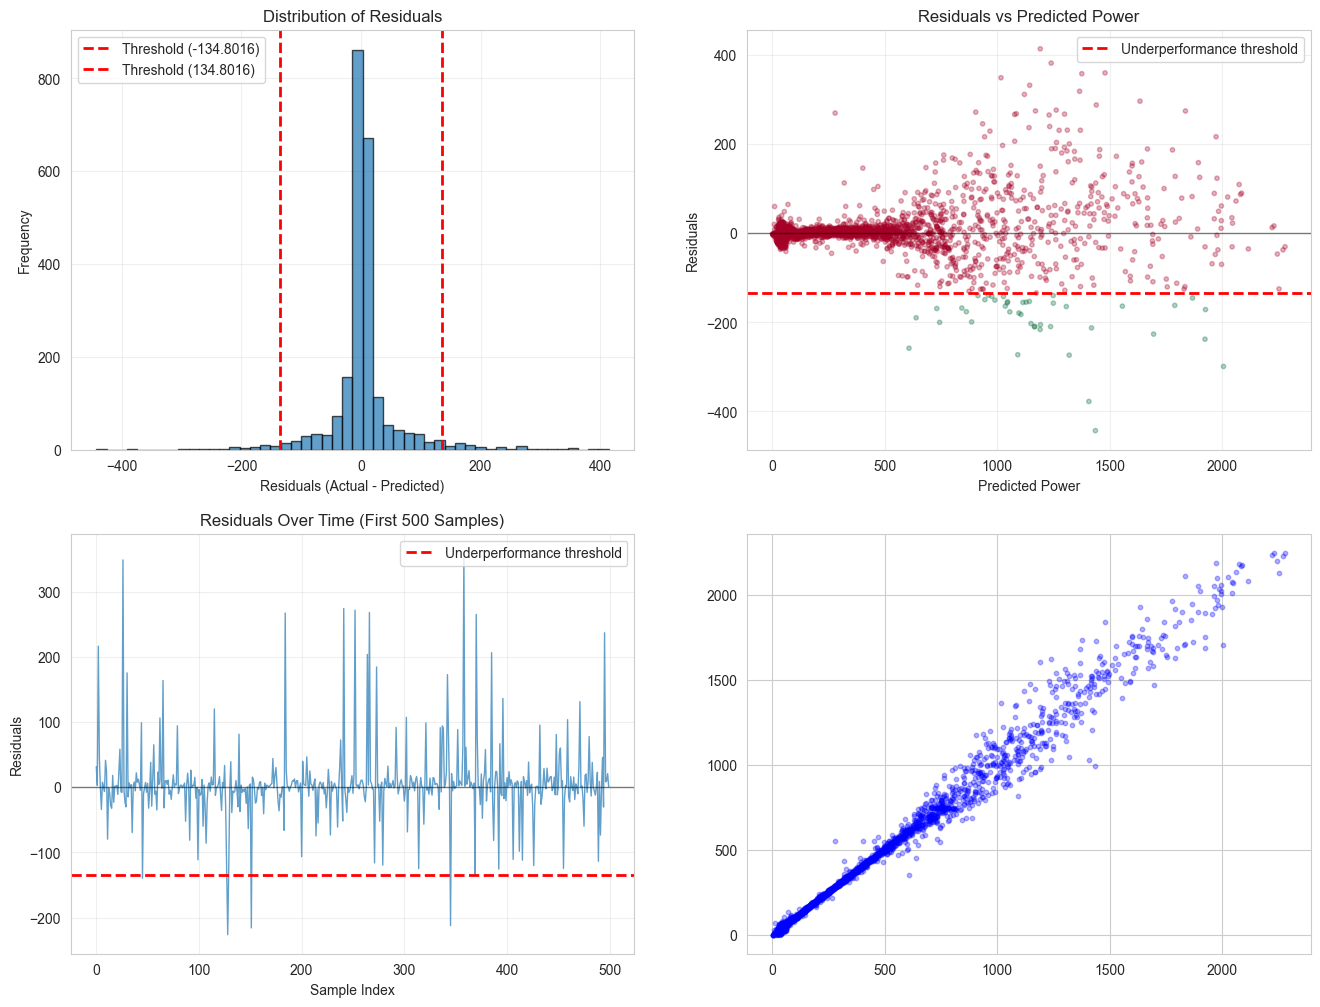

In [24]:
# Visualize residuals
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuals distribution
axes[0, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=-residual_threshold, color='r', linestyle='--', linewidth=2, label=f'Threshold (-{residual_threshold:.4f})')
axes[0, 0].axvline(x=residual_threshold, color='r', linestyle='--', linewidth=2, label=f'Threshold ({residual_threshold:.4f})')
axes[0, 0].set_xlabel('Residuals (Actual - Predicted)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Residuals')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals vs Predicted
axes[0, 1].scatter(y_test_pred_dnn, residuals, alpha=0.3, s=10, c=underperformance_flags, cmap='RdYlGn')
axes[0, 1].axhline(y=-residual_threshold, color='r', linestyle='--', linewidth=2, label='Underperformance threshold')
axes[0, 1].axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)
axes[0, 1].set_xlabel('Predicted Power')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted Power')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Time series of residuals (if we had time index)
axes[1, 0].plot(residuals.values[:500], alpha=0.7, linewidth=1)  # First 500 points
axes[1, 0].axhline(y=-residual_threshold, color='r', linestyle='--', linewidth=2, label='Underperformance threshold')
axes[1, 0].axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Over Time (First 500 Samples)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Underperformance flags visualization
underperformance_indices = np.where(underperformance_flags)[0]
axes[1, 1].scatter(y_test_pred_dnn, y_test, alpha=0.3, s=10, label='Normal operation', c='blue')
if len(underperformance_indices) > 0:
    axes[1, 1].scatter(y_test_pred_dnn.iloc[underperformance_indices], 
                     y_test.iloc[underperformance_indices], 
                     alpha=0.7, s=30, label='Underperforming', c='red', marker='x')
min_val = min(y_test.min(), y_test_pred_dnn.min())
max_val = max(y_test.max(), y_test_pred_dnn.max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'g--', linewidth=2, label='Perfect prediction')
axes[1, 1].set_xlabel('Predicted Power')
axes[1, 1].set_ylabel('Actual Power')
axes[1, 1].set_title('Underperforming Periods Detection')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('performance_monitoring.png', dpi=300, bbox_inches='tight')
plt.show()


### 8.2 Underperformance Analysis


In [ ]:
# Analyze underperforming periods
if underperformance_flags.sum() > 0:
    underperforming_data = pd.DataFrame({
        'Predicted': y_test_pred_dnn[underperformance_flags],
        'Actual': y_test[underperformance_flags],
        'Residual': residuals[underperformance_flags],
        'Power_Loss': y_test_pred_dnn[underperformance_flags] - y_test[underperformance_flags]
    })
    
    print("=== Underperforming Periods Analysis ===")
    print(f"\nStatistics of underperforming periods:")
    print(underperforming_data.describe())
    
    print(f"\nAverage power loss: {underperforming_data['Power_Loss'].mean():.4f}")
    print(f"Maximum power loss: {underperforming_data['Power_Loss'].max():.4f}")
    print(f"Total power loss: {underperforming_data['Power_Loss'].sum():.4f}")
else:
    print("No underperforming periods detected.")


## 9. Summary and Conclusions


In [ ]:
print("=== Project Summary ===")
print(f"\nDataset: engie_WT1_20000_merged.csv")
print(f"Original samples: {len(df)}")
print(f"After filtering (TARGET > 0): {len(df_filtered)}")
print(f"Final features used: {X_final.shape[1]}")
print(f"\nTrain/Val/Test split: {len(X_train)}/{len(X_val)}/{len(X_test)}")
print(f"\n=== Best Model Performance (DNN) ===")
print(f"Test MAE: {test_mae_dnn:.4f}")
print(f"Test R²: {test_r2_dnn:.4f}")
print(f"\n=== Turbine Performance Monitoring ===")
print(f"Underperforming periods detected: {underperformance_flags.sum()} ({100 * underperformance_flags.sum() / len(underperformance_flags):.2f}%)")
print(f"Residual threshold: {residual_threshold:.4f}")
